# Example Notebook

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
import os
os.getcwd()
os.chdir("..")
import numpy as np
import pandas as pd
import json
import os
import yaml
import numpy as np
from loguru import logger
import numpy as np
from loguru import logger
from matplotlib import pyplot as plt
from survos2 import survos

from survos2.frontend.control import Launcher
from survos2.model import DataModel
from survos2.improc.utils import DatasetManager
from survos2.server.pipeline import run_workflow
from survos2.server.state import cfg
from survos2.server.pipeline import view_dataset


# Set workspace

In [4]:

workspace_name = 'vf_3003_main' # set workspace here
DataModel.g.current_workspace = workspace_name
DataModel.g.current_session = 'default'

# Inspect workspace

In [5]:
survos.run_command('features', 'existing', uri=None, workspace=workspace_name)

DEBUG - API: <hug.api.API object at 0x2b2cf9174ee0>
  - survos2.survos:init_api:58
INFO - Config plugins: ['workspace', 'server', 'features', 'superregions', 'annotations', 'pipelines', 'objects', 'analyzer', 'roi', 'export']  - survos2.survos:init_api:67
INFO - Configuring api plugins  - survos2.survos:init_api:70
DEBUG - Loading plugin workspace  - survos2.survos:init_api:72
DEBUG - Loading plugin server  - survos2.survos:init_api:72
DEBUG - Loading plugin features  - survos2.survos:init_api:72
DEBUG - Loading plugin superregions  - survos2.survos:init_api:72
DEBUG - Loading plugin annotations  - survos2.survos:init_api:72
DEBUG - Loading plugin pipelines  - survos2.survos:init_api:72
DEBUG - Loading plugin objects  - survos2.survos:init_api:72
DEBUG - Loading plugin analyzer  - survos2.survos:init_api:72
DEBUG - Loading plugin roi  - survos2.survos:init_api:72
DEBUG - Loading plugin export  - survos2.survos:init_api:72
DEBUG - Using client <hug.use.Local object at 0x2b2d1366df40>  -

({'001_raw': {'kind': 'raw', 'name': '001 Raw', 'id': '001_raw'},
  '002_gaussian_blur': {'kind': 'gaussian_blur',
   'name': '002 Gaussian Blur',
   'sigma': [10.0, 10.0, 10.0],
   'source': '__data__',
   'id': '002_gaussian_blur'},
  '003_raw': {'kind': 'raw', 'name': '003 Unet Segmentation', 'id': '003_raw'},
  '004_raw': {'kind': 'raw', 'name': '004 Raw', 'id': '004_raw'},
  '005_raw': {'kind': 'raw', 'name': '005 Raw', 'id': '005_raw'},
  '006_raw': {'kind': 'raw', 'name': '006 Raw', 'id': '006_raw'},
  '007_raw': {'kind': 'raw', 'name': '007 Raw', 'id': '007_raw'},
  '008_threshold': {'kind': 'threshold',
   'name': '008 Threshold',
   'source': '003_raw',
   'thresh': 0.5,
   'id': '008_threshold'},
  '009_raw': {'kind': 'raw', 'name': '009 Raw', 'id': '009_raw'}},
 False)

In [6]:
survos.run_command('superregions', 'existing', uri=None, workspace=workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2d10e1f220>  - survos2.survos:run_command:111
DEBUG - get request to client: existing  - survos2.survos:run_command:114
DEBUG - Local client gave response Response(data={'data': {'001_supervoxels': {'compactness': 0.2, 'kind': 'supervoxels', 'mask_id': 'None', 'max_num_iter': 10, 'n_segments': 269120, 'name': '001 Supervoxels', 'out_dtype': 'uint32', 'source': '002_gaussian_blur', 'spacing': [1.0, 1.0, 1.0], 'zero_parameter': True, 'id': '001_supervoxels'}}, 'error': False}, status_code=200, headers={'content-type': 'application/json'})  - survos2.survos:run_command:116


({'001_supervoxels': {'compactness': 0.2,
   'kind': 'supervoxels',
   'mask_id': 'None',
   'max_num_iter': 10,
   'n_segments': 269120,
   'name': '001 Supervoxels',
   'out_dtype': 'uint32',
   'source': '002_gaussian_blur',
   'spacing': [1.0, 1.0, 1.0],
   'zero_parameter': True,
   'id': '001_supervoxels'}},
 False)

INFO - running survos_from_uri on survos:// uri  - survos2.data_io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_3003_main  - survos2.data_io:survos_from_uri:177
INFO - Closed: <survos2.model.dataset.Dataset object at 0x2b2d53a49d90>  - survos2.improc.utils:__exit__:568


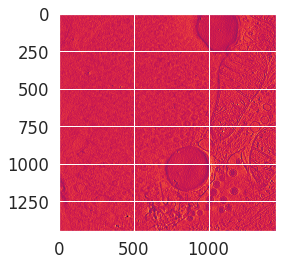

In [8]:
feature_array = view_dataset('001_raw', 'features', 100)

In [ ]:
# perform custom processing

In [9]:
import scipy

In [10]:
processed_image = scipy.ndimage.gaussian_laplace(feature_array, sigma=3)

In [11]:
processed_image.shape

(128, 1450, 1450)

In [12]:
processed_image

array([[[ 1.09386491e-02,  9.62226000e-03,  6.89124595e-03, ...,
         -6.54761028e-03, -8.90335348e-03, -1.02451630e-02],
        [ 1.08007686e-02,  9.48126242e-03,  6.79443451e-03, ...,
         -5.17859636e-03, -7.13202171e-03, -8.26590322e-03],
        [ 1.03758536e-02,  9.06769931e-03,  6.49521127e-03, ...,
         -2.85482896e-03, -4.15769871e-03, -4.96037677e-03],
        ...,
        [ 5.09587117e-05,  9.81304911e-04,  2.12428579e-03, ...,
         -6.23097783e-03, -8.61929450e-03, -9.92689468e-03],
        [ 5.20830741e-04,  1.44247245e-03,  2.53977906e-03, ...,
         -4.87286691e-03, -7.00286776e-03, -8.18461739e-03],
        [ 7.49568688e-04,  1.63736928e-03,  2.66417325e-03, ...,
         -3.82052478e-03, -5.72856981e-03, -6.79557398e-03]],

       [[ 1.13522429e-02,  9.81980655e-03,  6.79106079e-03, ...,
         -6.72454294e-03, -8.64406675e-03, -9.72354598e-03],
        [ 1.10512469e-02,  9.54690762e-03,  6.61666412e-03, ...,
         -5.37819695e-03, -6.93625398e

In [19]:
from survos2.frontend.nb_utils import add_feature

In [20]:
add_feature(processed_image, "gaussian_laplace", workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2dd946cb30>  - survos2.survos:run_command:111
DEBUG - get request to client: create  - survos2.survos:run_command:114
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]

Created new feature with id: 010_raw


# Modify annotations

In [13]:
survos.run_command('annotations', 'get_levels', uri=None, workspace=workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2c708993b0>  - survos2.survos:run_command:111
DEBUG - get request to client: get_levels  - survos2.survos:run_command:114
DEBUG - Local client gave response Response(data={'data': [{'kind': 'level', 'labels': {'2': {'color': '#f57900', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#cc0000', 'idx': 3, 'name': 'Label', 'visible': True}}, 'modified': [1], 'name': '001 Level', 'id': '001_level'}, {'kind': 'level', 'labels': {'2': {'color': '#75507b', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#73d216', 'idx': 3, 'name': 'Label', 'visible': True}}, 'modified': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'name': '002 Level', 'id': '002_level'}, 

([{'kind': 'level',
   'labels': {'2': {'color': '#f57900',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#cc0000', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [1],
   'name': '001 Level',
   'id': '001_level'},
  {'kind': 'level',
   'labels': {'2': {'color': '#75507b',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#73d216', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    

INFO - running survos_from_uri on survos:// uri  - survos2.data_io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_3003_main  - survos2.data_io:survos_from_uri:177
INFO - Closed: <survos2.model.dataset.Dataset object at 0x2b2dd94b0070>  - survos2.improc.utils:__exit__:568


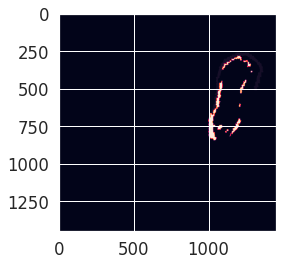

In [24]:
anno_001_level = view_dataset('001_level', 'annotations',66)
anno_001_level = anno_001_level & 15 # anno images have to be processed with this command (because of the way history works)

In [25]:
np.unique(anno_001_level)

array([0, 1], dtype=uint32)

In [27]:
anno_001_level_mod = anno_001_level + 2 #shift all the labels by 1

In [28]:
np.unique(anno_001_level_mod)

array([2, 3], dtype=uint32)

In [26]:
from survos2.frontend.nb_utils import add_anno

In [29]:
add_anno(anno_001_level_mod, "Modified Level", workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2d53a71270>  - survos2.survos:run_command:111
DEBUG - get request to client: add_level  - survos2.survos:run_command:114
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
INFO - Creating dataset on /dls/science/groups/das/SuRVoS/s2/data/avery/vf_3003_main/default/annotations/005_level [128, 1450, 1450] uint32 None 10  - survos2.model.dataset:create:246
DEBUG - <survos2.model.dataset.Dataset object

Created new annotation with id: 005_level
